<a href="https://colab.research.google.com/github/Mohit2409/Bitcoin-Predictor/blob/main/Predict_Bitcoin_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install mwclient

In [ ]:
import mwclient
import time

#Set the specific Wikipedia site
site = mwclient.Site("en.wikipedia.org")
#Set the page
page = site.pages["Bitcoin"]

In [ ]:
revs = list(page.revisions())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
revs[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OrderedDict([('revid', 1221526580),
             ('parentid', 1221463391),
             ('user', 'A455bcd9'),
             ('timestamp',
              time.struct_time(tm_year=2024, tm_mon=4, tm_mday=30, tm_hour=13, tm_min=19, tm_sec=7, tm_wday=1, tm_yday=121, tm_isdst=-1)),
             ('comment', '/* Units and divisibility */')])

In [ ]:
revs = sorted(revs, key = lambda rev: rev["timestamp"])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
revs[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OrderedDict([('revid', 275832581),
             ('parentid', 0),
             ('user', 'Pratyeka'),
             ('timestamp',
              time.struct_time(tm_year=2009, tm_mon=3, tm_mday=8, tm_hour=16, tm_min=41, tm_sec=7, tm_wday=6, tm_yday=67, tm_isdst=-1)),
             ('comment', 'creation (stub)')])

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

#Create a function
def find_sentiment(text):
    #Let's set the maximum text size to 250 characters
    sent = sentiment_pipeline([text[:250]])[0]
    #The sentiment will be determined by a number.
    #It will be a positive sentiment when the number is positive and
    #a negative sentiment when the number is negative
    score = sent["score"]
    if sent["label"] == "Negative":
        score *= -1
    return score

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be a

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
edits = {}

#Build a loop for
for rev in revs:
    date = time.strftime("%Y-%m-%d", rev["timestamp"])
    #Append the date count on dict
    if date not in edits:
        edits[date] = dict(sentiments = list(), edit_count=0)

    edits[date]["edit_count"] += 1
    #Append the sentiment value on dict
    edits[date]["sentiments"].append(find_sentiment(rev.get('comment', '')))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from statistics import mean

for key in edits:
    if len(edits[key]["sentiments"]) > 0:
        edits[key]["sentiment"] = mean(edits[key]["sentiments"])
        edits[key]["neg_sentiment"] = len([s for s in edits[key]["sentiments"] if s > 0]) / len(edits[key]["sentiments"])
    else:
        edits[key]["sentiment"] = 0
        edits[key]["neg_sentiment"] = 0

    del edits[key]["sentiments"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
edits_df = pd.DataFrame.from_dict(edits, orient='index')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
edits_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,neg_sentiment
2009-03-08,4,0.924585,1.0
2009-08-05,1,0.748121,1.0
2009-08-06,2,0.995746,1.0
2009-08-14,1,0.930021,1.0
2009-10-13,2,0.767936,1.0
...,...,...,...
2024-04-11,2,0.824999,1.0
2024-04-20,1,0.933548,1.0
2024-04-21,2,0.997940,1.0
2024-04-27,3,0.999755,1.0


In [ ]:
edits_df.index = pd.to_datetime(edits_df.index)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from datetime import datetime

dates = pd.date_range(start = '2009-03-08', end = datetime.today())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dates

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DatetimeIndex(['2009-03-08', '2009-03-09', '2009-03-10', '2009-03-11',
               '2009-03-12', '2009-03-13', '2009-03-14', '2009-03-15',
               '2009-03-16', '2009-03-17',
               ...
               '2024-04-24', '2024-04-25', '2024-04-26', '2024-04-27',
               '2024-04-28', '2024-04-29', '2024-04-30', '2024-05-01',
               '2024-05-02', '2024-05-03'],
              dtype='datetime64[ns]', length=5536, freq='D')

In [ ]:
edits_df = edits_df.reindex(dates, fill_value=0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
edits_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,neg_sentiment
2009-03-08,4,0.924585,1.0
2009-03-09,0,0.000000,0.0
2009-03-10,0,0.000000,0.0
2009-03-11,0,0.000000,0.0
2009-03-12,0,0.000000,0.0
...,...,...,...
2024-04-29,0,0.000000,0.0
2024-04-30,4,0.988488,1.0
2024-05-01,0,0.000000,0.0
2024-05-02,0,0.000000,0.0


In [ ]:
rolling_edits = edits_df.rolling(30).mean()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rolling_edits

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,neg_sentiment
2009-03-08,NaN,NaN,NaN
2009-03-09,NaN,NaN,NaN
2009-03-10,NaN,NaN,NaN
2009-03-11,NaN,NaN,NaN
2009-03-12,NaN,NaN,NaN
...,...,...,...
2024-04-29,0.366667,0.188744,0.200000
2024-04-30,0.500000,0.221694,0.233333
2024-05-01,0.500000,0.221694,0.233333
2024-05-02,0.500000,0.221694,0.233333


In [ ]:
rolling_edits = rolling_edits.dropna()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
rolling_edits

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,0.030820,0.033333
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-04-29,0.366667,0.188744,0.200000
2024-04-30,0.500000,0.221694,0.233333
2024-05-01,0.500000,0.221694,0.233333
2024-05-02,0.500000,0.221694,0.233333


In [ ]:
rolling_edits.to_csv("wikipedia_edits.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install yfinance

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import yfinance as yf
import os

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc_ticker = yf.Ticker('BTC-USD')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc = btc_ticker.history(period='max')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-28 00:00:00+00:00,63423.515625,64321.484375,62793.597656,63113.230469,17334827993,0.0,0.0
2024-04-29 00:00:00+00:00,63106.363281,64174.878906,61795.457031,63841.121094,26635912073,0.0,0.0
2024-04-30 00:00:00+00:00,63839.417969,64703.332031,59120.066406,60636.855469,37840840057,0.0,0.0


In [ ]:
btc.index = pd.to_datetime(btc.index)
btc.index = btc.index.tz_localize(None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
del btc['Dividends']
del btc['Stock Splits']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc.columns = [i.lower() for i in btc.columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,open,high,low,close,volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2024-04-28,63423.515625,64321.484375,62793.597656,63113.230469,17334827993
2024-04-29,63106.363281,64174.878906,61795.457031,63841.121094,26635912073
2024-04-30,63839.417969,64703.332031,59120.066406,60636.855469,37840840057


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='Date'>

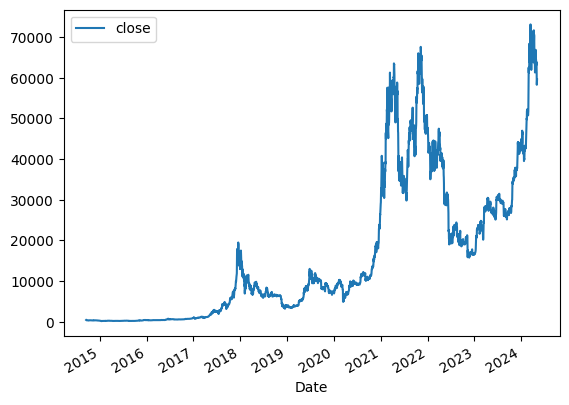

In [ ]:
btc.plot.line(y = 'close', use_index = True)

In [ ]:
wiki = pd.read_csv('wikipedia_edits.csv', index_col = 0, parse_dates = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc = btc.merge(wiki, left_index=True, right_index=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,0.777198,0.833333
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,0.777766,0.833333
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,0.805359,0.866667
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,0.809192,0.866667
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,0.804962,0.866667
...,...,...,...,...,...,...,...,...
2024-04-28,63423.515625,64321.484375,62793.597656,63113.230469,17334827993,0.366667,0.188744,0.200000
2024-04-29,63106.363281,64174.878906,61795.457031,63841.121094,26635912073,0.366667,0.188744,0.200000
2024-04-30,63839.417969,64703.332031,59120.066406,60636.855469,37840840057,0.500000,0.221694,0.233333
2024-05-01,60609.496094,60780.500000,56555.292969,58254.011719,48439780271,0.500000,0.221694,0.233333


In [ ]:
btc['tomorrow'] = btc['close'].shift(-1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,0.777198,0.833333,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,0.777766,0.833333,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,0.805359,0.866667,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,0.809192,0.866667,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,0.804962,0.866667,402.152008
...,...,...,...,...,...,...,...,...,...
2024-04-28,63423.515625,64321.484375,62793.597656,63113.230469,17334827993,0.366667,0.188744,0.200000,63841.121094
2024-04-29,63106.363281,64174.878906,61795.457031,63841.121094,26635912073,0.366667,0.188744,0.200000,60636.855469
2024-04-30,63839.417969,64703.332031,59120.066406,60636.855469,37840840057,0.500000,0.221694,0.233333,58254.011719
2024-05-01,60609.496094,60780.500000,56555.292969,58254.011719,48439780271,0.500000,0.221694,0.233333,59550.261719


In [ ]:
btc['target'] = (btc['tomorrow'] > btc['close']).astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
btc['target'].value_counts()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


target
1    1863
0    1653
Name: count, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Let's start by training 100 individual decision trees
#Each individual decision tree can only split its node when there are more than 50 samples
model = RandomForestClassifier(n_estimators = 100, min_samples_split=50, random_state=1)

#Splitting the data to create a training model and a test model
train = btc.iloc[:-200]
test = btc[-200:]

#Define the predictors
predictors = ['close', 'volume', 'open', 'high', 'low', 'edit_count', 'sentiment', 'neg_sentiment']
model.fit(train[predictors], train['target'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier(min_samples_split=50, random_state=1)

In [ ]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index = test.index)
precision_score(test['target'], preds)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.5434782608695652

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name='predictions')
    #Combine real and predicted values into a single dataset
    combined = pd.concat([test['target'], preds], axis=1)
    return combined

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    #Concatenate all forecasts
    return pd.concat(all_predictions)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state = 1, learning_rate = .1, n_estimators = 200)
predictions = backtest(btc, model, predictors)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
precision_score(predictions['target'], predictions['predictions'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.8511795249192526